# Distributions

Welcome! This workshop is from [TrainingDataScience.com](https://trainingdatascience.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual). Sign up to receive more free workshops, training and videos.

This workshop is about another way of presenting data. We can plot how frequent observations are to better characterise the data.

Imagine you had some data. For sake of example, imagine that is a measure of peoples' height. If you measured 10 people, then you would see 10 different heights. The heights are said to be _distributed_ along the height axis.

In [1]:
import numpy as np
heights = [ 5.36, 5.50, 5.04, 5.00, 6.00,  6.27, 5.56, 6.10, 5.78, 5.27]

We can calculate the value of the mean and standard deviation like before:

In [2]:
print("μ =", np.mean(heights), ", σ =", np.std(heights))

μ = 5.588 , σ = 0.417320021087


And that's great at summarising the data, but it doesn't explain all of the data. Thankfully our brain contains a very complex _Convolutional Neural Network_ called the _Visual Cortex_. This is able to accept images of data and generate very sophisticated mental models of what is really going on.

One of the most useful images we can generate is called a _Histogram_. This comes from the Greek _Histos_ which means web, and the English _-gram_ which means encoding.

## Histogram

A Histogram is a count of the number of occasions that an observation lands inside an upper and lower bound. The space between an upper and lower bound is called a bin. In other words, we're plotting the frequency of a particular set of values.

Imagine we picked a bin width of 0.2 and we were given the $heights$ data above.

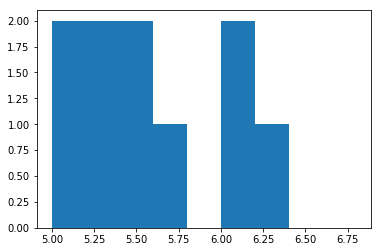

In [3]:
import matplotlib.pyplot as plt
plt.hist(heights, bins=[5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8])
plt.show()

`matplotlib` is a famous Python plotting library, but it's API is rather annoying. I've used it here because it's the most prolific; not the best.

We've used the `matplotlib.pyplot.hist` function to create a plot of our data. Of course, we could write code to produce a histogram ourselves, but we don't want to waste time re-writing code that developers much better than ourselves have spent years creating!

Finally, I've provided an array (list) of bin boundaries. Usually we'd generate these programatically or allow the library to pick bins for us.

## Analysis

What can we say about the data from that image? Well, we can immediately talk about the _Range_ of the data, which is the difference between the maximum and the minimum. Also we can see that the Mean value, 5.6, doesn't look very typical. There's only one observation in that bin and the bin next to it is empty!

But the main thing to notice is the shape of the _envelope_ of the data. If we were to draw a line over the peaks, this will usually look like a very specific shape.

The original data is generated from one of these shapes, but I only generated 10 samples. Let's generate 50 and 100.

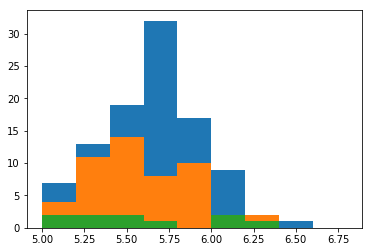

In [4]:
plt.hist(0.3*np.random.randn(100) + 5.6, bins=[5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8])
plt.hist(0.3*np.random.randn(50) + 5.6, bins=[5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8])
plt.hist(heights, bins=[5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8])
plt.show()

Here I've plotted the heights data on top of two new datasets which have been generated with 50 and 100 samples. Notice that with increasing numbers of random samples, we're starting to see a peak.

Now we would be quite happy to say that the tendency does centre around 5.6.

Also notice how many samples it took before we started seeing a peak in the histogram, even though the calculation of the mean was pretty good, even with 10 samples.

Now, let's repeat the same procress for a different type of data.

## Different Data

Imagine that our company deals with Software Engineering projects. We're a big company, so we have lots of projects per year, but some of those projects go wrong. Over the years, we've recorded how many bad projects we have per year. Next year, how many bad projects are we going to have?

First, here is some data. This data was produced by counting how many bad projects we had each year (I'm assuming the consistent underlying features like total number of projects, static economic circumstances, etc.).



In [5]:
bad = [0,1,0,0,0,0,1,1,0,0,1,2,0,3,1,3,0,2,0,1]
print("μ =", np.mean(bad), ", σ =", np.std(bad))

μ = 0.8 , σ = 0.979795897113


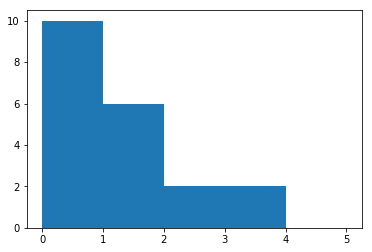

In [6]:
plt.hist(bad, bins=[0, 1, 2, 3, 4, 5])
plt.show()

The mean is about 0.8. Remember that the mean is the expected value for a specific shape of distribution (I still haven't told you what these are yet).

But we can clearly see from the histogram above that the most likely value is 0, with chances decreasing as we increase the number of problems.

What's even worse is that the standard deviation, the measure of the spread, is saying that it is very likely to spread to beyond the mean minus the standard deviation, which is $-0.2$. Our data doesn't show any sign of negatives. In fact, we know from our problem statement that we can't have negative problem projects. That's impossible!

So what's going on?

### Distributions

The reason is because the underlying data isn't _distributed_ in the same way as the previous example. In fact, it's so different that we can't use the mean and standard deviation as a summary statistic!

In [7]:
print(",".join(np.random.poisson(0.7, 20).astype(str)))

0,0,1,2,1,1,0,1,0,0,0,0,0,1,2,1,2,0,0,1


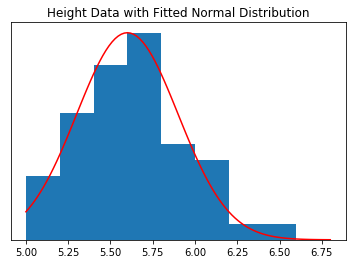

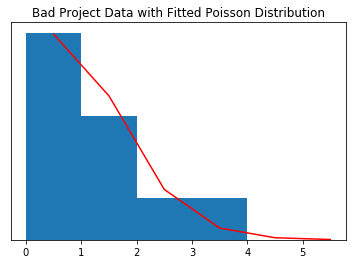

In [8]:
import scipy.stats as stats

# Height data (50 samples)
heights = 0.3*np.random.randn(50) + 5.6
bins = [5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8]
plt.hist(heights, bins=bins, normed=True)
x = np.linspace(5, 6.8, 100)
pdf_fitted = stats.norm.pdf(x, 5.6, 0.3)
plt.plot(x, pdf_fitted, color='r')
plt.title("Height Data with Fitted Normal Distribution")
plt.yticks([])
plt.show()

# Bad project data
bins = np.array([0, 1, 2, 3, 4, 5])
plt.hist(bad, bins=bins, normed=True)
pdf_fitted = stats.poisson.pmf(bins, 0.7)
plt.plot(bins + 0.5, pdf_fitted, color='r')
plt.title("Bad Project Data with Fitted Poisson Distribution")
plt.yticks([])
plt.show()

Above we plotted to the two histograms and fitted by two probability distributions. The first is a _Normal_ or _Gaussian_ distribution and the second is a _Poisson_ distribution.

The Normal distribution is described by the mean and standard deviation. The Poisson distribution is defined by a single parameter, $\lambda$, and in our example can be interpreted as the average number of problematic projects in a one-year period.

## What's the Big Deal?

I would hazard a guess at saying that around half of the data you work with will be normally distributed. The other half is taken up by tens of different distributions.

The issue is that nearly every Data Science algorithm that is used on a day-to-day basis assumes data that is distributed normally. For example, whenever an algorithm uses a mean or standard deviation, it is assuming that the data can be described by these summary statistics. 

Hence, when you get really poor results in more advanced techniques, the first thing you should check is how your data is distributed. Is it Normal? Can you make it Normal?

# Histograms and Inverting Skewed Data

When we first receive some data, it can be in a mess. If we tried to force that data into a model it is more than likely that the results will be useless.

So we need to spend a significant amount of time _cleaning_ the data. This workshop is all about bad data.

In [9]:
# These are the standard imports that we will use all the time.
import os                             # Library to do things on the filesystem
import pandas as pd                   # Super cool general purpose data handling library
import matplotlib.pyplot as plt       # Standard plotting library
import numpy as np                    # General purpose math library
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again

## Dummy data investigation

For this part of the workshop we're going to create some "dummy" data. Dummy data is great for
messing around with new tools and technologies. And they serve as reference datasets for people
to compete against.

However, as you will see, dummy data is never as complex as the real world...

In [10]:
# Generate some data
np.random.seed(42)  # To ensure we get the same data every time.
X = (np.random.randn(100,1) * 5 + 10)**2
print(X[:10])

[[ 155.83953905]
 [  86.65149531]
 [ 175.25636487]
 [ 310.29348423]
 [  77.9553576 ]
 [  77.95680717]
 [ 320.26910947]
 [ 191.4673745 ]
 [  58.56271638]
 [ 161.61528938]]


Let's print the mean and standard deviation of this data.

In [11]:
# Print the mean and standard deviation
print("Raw: %0.3f +/- %0.3f" % (np.mean(X), np.std(X)))

Raw: 110.298 +/- 86.573


This is telling us that we should expect to see approximately two thirds of the values to occur in the range 110 +/- 87. However, this data is not quite as it seems.

### Histograms

A histogram is one of the most basic but useful plots you can use to visualise the data contained within a feature.

If we imagine a range of bins, in this example let's imagine bins that are 25 wide and extend from zero up to 350 ish. What we can do is count the number of times that we see an observation falling within each bin. This is known as a Histogram (often we also perform some scaling to the raw counts, but we'll ignore that for now).

Let's plot the histogram of the above data to see what's going on.

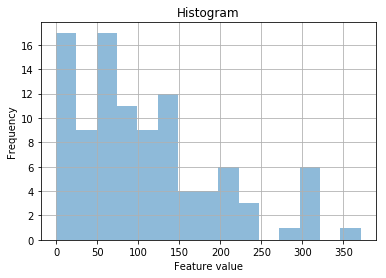

In [12]:
df = pd.DataFrame(X) # Create a pandas DataFrame out of the numpy array
df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

We can see that the data appears pretty noisy. And it's strangly skewed.

With experience, you would notice that all the data are positive, this is strange.
You would also notice that there appears to be a downward-curved slope from a feature value of 0 to 350.

This is indicating some sort of power law, or exponential.

We can transform the data, by trying to invert the mathematical operation that has occured up to the point where we measured it. This is ok, we're not altering the data, we're just changing how it is represented.

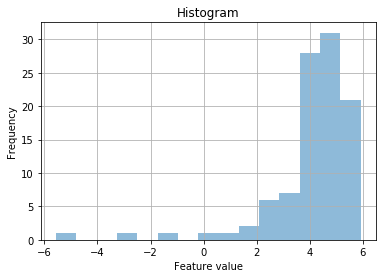

In [13]:
df_exp = df.apply(np.log)   # pd.DataFrame.apply accepts a function to apply to each column of the data
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

Ok, that still looks a bit weird. I wonder if it's a power law?

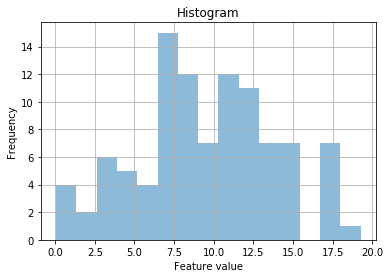

In [14]:
df_pow = df.apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

That's looking much better! So it looks like it is a power law (to the power of 2). But to be sure,
let's fit a normal curve over the top...

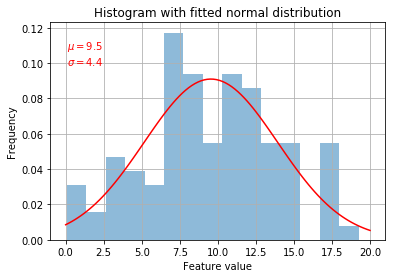

In [15]:
param = stats.norm.fit(df_pow)   # Fit a normal distribution to the data

x = np.linspace(0, 20, 100)      # Linear spacing of 100 elements between 0 and 20.
pdf_fitted = stats.norm.pdf(x, *param)    # Use the fitted paramters to create the y datapoints

# Plot the histogram again
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, normed=True, legend=None)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=np.min(df_pow), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')

# Plot a line of the fitted distribution over the top 
plt.plot(x, pdf_fitted, color='r')

# Standard plot stuff
plt.xlabel("Feature value")
plt.title("Histogram with fitted normal distribution")
plt.show()

Yeah, definitely looking pretty good. **Always try to visualise your data to make sure it conforms to your expectations**

Remember that some algorithms don't like data that isn't centred around 0 and they don't like it when the standard deviation isn't 1.

So we transform the data by scaling with the `StandardScaler`...

In [16]:
from sklearn import preprocessing

X_s = preprocessing.StandardScaler().fit_transform(df_pow)
X_s = pd.DataFrame(X_s)   # Put the np array back into a pandas DataFrame for later
print("StandardScaler: %0.3f +/- %0.3f" % (np.mean(X_s), np.std(X_s)))

# Nice! This should be 0.000 +/- 1.000

StandardScaler: -0.000 +/- 1.000


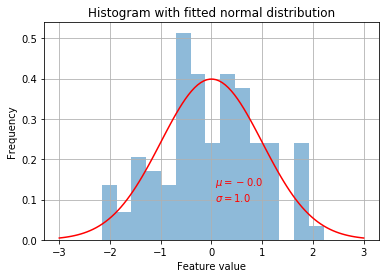

In [17]:
param = stats.norm.fit(X_s)
x = np.linspace(-3, 3, 100)
pdf_fitted = stats.norm.pdf(x, *param)
X_s.plot.hist(alpha=0.5, bins=15, grid=True, normed=True, legend=None)
plt.text(x=np.min(df_pow), y=0.1, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1], color='r')
plt.xlabel("Feature value")
plt.title("Histogram with fitted normal distribution")
plt.plot(x, pdf_fitted, color='r')
plt.show()

Beautiful!

In [18]:
np.random.seed(42)  # To ensure we get the same data every time.
X = np.log((np.random.randn(100,1) * 5 + 20))
df = pd.DataFrame(X) # Create a pandas DataFrame out of the numpy array

## Tasks

- Given the data `df` above, attempt to normalise the data.

# Correlating Data

Correlations between features are bad because you are effectively telling the model that this information is twice more important than everything else. You're feeding the model the same data twice.

Technically it's known as _multicollinear_, which is the generalisation to any number of features that could be correlated.

Generally correlating features will decrease the performance of your model, so we need to find them and remove them.

Again, let's generate some dummy data for simplicity...

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.random.randn(100,5)
noise = np.random.randn(100)
X[:,0] = 2*X[:,2] + 3*X[:, 4] + 0.5*noise

The easiest way of spotting correlating features is to generate a _scatter matrix_. This is an image which plots each feature against each other feature.

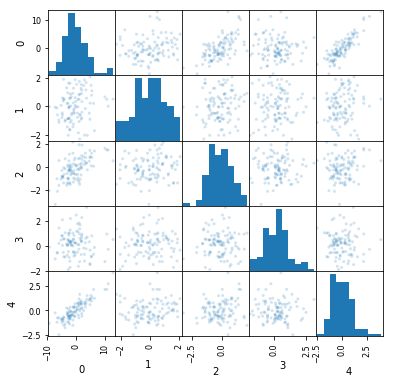

In [20]:
# Here, we're plotting a "scatter matrix". I.e. a matrix of scatter plots of each feature.
# Its really useful for spotting dodgy data.

from pandas.plotting import scatter_matrix
df = pd.DataFrame(X)
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

We can see that there is some linearity in the plots. Definitely in the top right.

Again, the simplest thing to do at this stage is manually remove that feature.

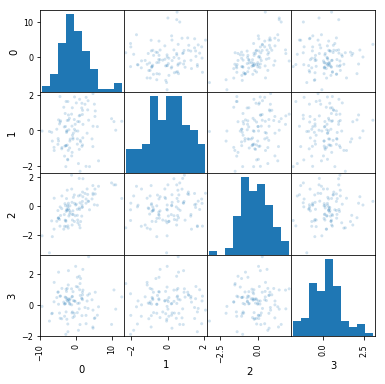

In [21]:
del df[4]
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

There's still a little bit of correlation in the second feature, but it's not huge. Try scoring your model with and without this feature.

We could perform this process in a more quantitative manner using eigenvectors and eigenvalues to spot the correlation, but that's a bit too complex to consider at this point.

In [22]:
X = np.random.randn(100,5)
noise = np.random.randn(100)
X[:,1] = 0.5*X[:, 2] + 0.5*noise
df = pd.DataFrame(X)

## Tasks

- Give the data `df` above, remove the correlation

# Data Cleaning Example - Loan Data

A huge amount of time is spent cleaning, removing, scaling data. All in an effort to squeeze
a bit more performance out of the model.

The data we are using is from Kaggle, and is available in raw from from
[here](https://www.kaggle.com/wendykan/lending-club-loan-data). You will need to sign into kaggle if you want to download the full data. I've included just a small sample.

It is a loan dataset, showing the loans that have suffered repayment issues. There are a lot of
columns and many of them are useless. Many more columns have missing data.

The goal that I set out to achieve was to attempt to predict which loans would suffer problems
but we will see that it will require a lot more time to get right.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("https://s3.eu-west-2.amazonaws.com/free.trainingdatascience.com/data/loan_small.csv")

In [24]:
# These are the columns
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [25]:
# There are some columns called "id". ID columns don't provide any predictive power
# so let's double check, then remove them.
display(data[["id", "member_id", "emp_title"]].head())
data.drop(['id', 'member_id'], axis=1, inplace=True)

,id,member_id,emp_title
0,1077501,1296599,NaN
1,1077430,1314167,Ryder
2,1077175,1313524,NaN
3,1076863,1277178,AIR RESOURCES BOARD
4,1075358,1311748,University Medical Group


Let's take a deeper look at the data.

I see that there are a combination of numerical, catagorical
and some messed up catagorical data here.

Let's try and fix some of the columns as an example. In reality, you'd have to do a
lot more to fix this data.

In [26]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
display(set(data["emp_length"]))
data.replace('n/a', np.nan,inplace=True)

{'< 1 year',
 nan,
 '4 years',
 '1 year',
 '8 years',
 '5 years',
 '3 years',
 '2 years',
 '6 years',
 '7 years',
 '9 years',
 '10+ years'}

In [28]:
data.emp_length.fillna(value=0,inplace=True)
set(data["emp_length"])

{'< 1 year',
 0,
 '4 years',
 '1 year',
 '8 years',
 '5 years',
 '3 years',
 '2 years',
 '6 years',
 '7 years',
 '9 years',
 '10+ years'}

In [29]:
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)
set(data["emp_length"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

I see another field called term that can be reduced to a better label

In [30]:
set(data['term'])

{' 36 months', ' 60 months'}

In [31]:
data['term'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['term'] = data['term'].astype(int)
set(data["term"])

{36, 60}

Now let's try and define what a bad loan is...

In [32]:
set(data["loan_status"])

{'Charged Off', 'Current', 'Default', 'Fully Paid', 'Late (31-120 days)'}

In [33]:
# This indicates a bad loan. Something we want to predict
bad_indicator = data["loan_status"].isin(["Charged Off", "Default", "Late (31-120 days)"])
# Remove this from dataset
data.drop(["loan_status"], axis=1, inplace=True)
bad_indicator.value_counts()

False    820
True     179
Name: loan_status, dtype: int64

Note to future self, we have unbalanced classes here. This affects some algorithms.

In [34]:
# Find columns that have all nans and remove
naughty_cols = data.columns[data.isnull().sum() == len(data)]
data.drop(naughty_cols, axis=1, inplace=True)

In [35]:
# Any more nans?
data.columns[data.isnull().any()].tolist()

['emp_title',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d']

In [36]:
# We could write some code to do this, but I'm going to do it manually for now
string_features = ["emp_title", "desc"]
data[string_features] = data[string_features].fillna(value='')
numeric_features = ["mths_since_last_delinq", "mths_since_last_record"]
data[numeric_features] = data[numeric_features].fillna(value=0)

In [37]:
# Any more nans, just ditch them?
just_ditch = data.columns[data.isnull().any()].tolist()
just_ditch

['last_pymnt_d', 'next_pymnt_d']

In [38]:
data.drop(just_ditch, axis=1, inplace=True)

Normally, we would continue improving the features until we were happy we couldn't do any more.

When you do, remember that you will have to repeat the same steps to any new incoming data.
So remember to make the pre-processing clean and pretty.

Now, let's try and convert all those string values into numeric catagories for a tree algorithm...

In [39]:
from sklearn import preprocessing

selected = pd.DataFrame(data)

X = selected.apply(preprocessing.LabelEncoder().fit_transform)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,32,32,32,0,6,119,1,6,0,10,...,209,0,0,0,128,19,0,0,0,0
1,12,12,12,1,13,9,2,13,582,1,...,71,0,27,4,79,44,0,0,0,0
2,10,10,10,0,14,28,2,14,0,10,...,132,0,0,0,525,19,0,0,0,0
3,92,99,111,0,10,361,2,10,12,10,...,588,13,0,0,323,18,0,0,0,0
4,14,14,14,1,9,13,1,9,744,1,...,271,0,0,0,44,19,0,0,0,0


In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3)
clf = clf.fit(X, bad_indicator)

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, bad_indicator, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.94 (+/- 0.04)


Uh oh! Look how high that accuracy score is!

This should raise alarm bells.

Either the problem is super simple (and you can see the simplicity in plots) or something is not right.

Let's look at the importances...

Feature ranking:
1. collection_recovery_fee (0.367956)
2. recoveries (0.194140)
3. total_rec_prncp (0.183480)
4. total_pymnt (0.099906)
5. total_pymnt_inv (0.042872)
6. funded_amnt (0.042638)
7. total_rec_late_fee (0.015095)
8. last_pymnt_amnt (0.013317)
9. url (0.006635)
10. emp_length (0.006529)
11. installment (0.005544)
12. last_credit_pull_d (0.004893)
13. revol_util (0.004202)
14. title (0.003670)
15. purpose (0.002012)
16. addr_state (0.001564)
17. revol_bal (0.001559)
18. total_rec_int (0.001532)
19. out_prncp (0.001118)
20. annual_inc (0.000907)
21. int_rate (0.000432)
22. emp_title (0.000000)
23. sub_grade (0.000000)
24. home_ownership (0.000000)
25. grade (0.000000)
26. verification_status (0.000000)
27. issue_d (0.000000)
28. term (0.000000)
29. pymnt_plan (0.000000)
30. funded_amnt_inv (0.000000)
31. acc_now_delinq (0.000000)
32. earliest_cr_line (0.000000)
33. desc (0.000000)
34. zip_code (0.000000)
35. dti (0.000000)
36. delinq_2yrs (0.000000)
37. application_type (0.000

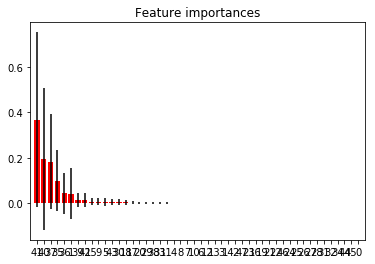

In [42]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = X.columns

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Ahhhhhh. Look at the top two features:

1. collection_recovery_fee (0.254455)
2. recoveries (0.219021)

The recovery fee recieved and the number of recoveries. These are directly related to loan defaults;
you will only get a recovery if there is a loan default.

Clearly, we won't have these features unless a default has already occured and in that case, there's
certainly no point in trying to predict it!

This is a perfect example of _data leakage_. This is where you use data that is impossible to
obtain at the time, usually because it is a direct consequence of an event that you are trying to 
predict.

Just for further giggles, let's plot a _box plot_ of the recoveries data...

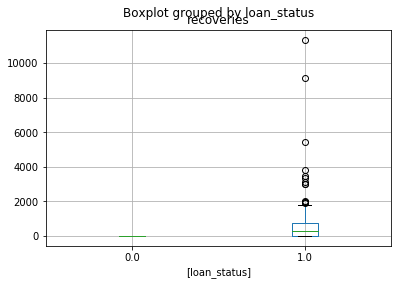

In [43]:
loan_amount = pd.DataFrame([selected["recoveries"], bad_indicator]).transpose()
loan_amount.boxplot(by="loan_status")
plt.show()

This is plotting the recoveries data by the loan status. Note how all of the "normal" loans
have zero recoveries.

If this really was a feature we could just threshold above 0 and say it was "suffering".

Hence why we got 95% in the accuracy score!

**However, this begs the question, if this was so easy, why did we get 95% and not 100%?!?!**

Let's remove those features and try again...

In [44]:
X.drop(["collection_recovery_fee", "recoveries"], axis=1, inplace=True)

In [45]:
clf = RandomForestClassifier(max_depth=3)
clf = clf.fit(X, bad_indicator)
scores = cross_val_score(clf, X, bad_indicator, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.86 (+/- 0.01)


Ok, this is starting to look a bit more feasible

Feature ranking:
1. total_rec_prncp (0.448753)
2. total_pymnt_inv (0.135914)
3. total_pymnt (0.079042)
4. loan_amnt (0.066316)
5. funded_amnt_inv (0.047604)
6. total_rec_int (0.032647)
7. zip_code (0.023197)
8. revol_util (0.018872)
9. term (0.018008)
10. last_credit_pull_d (0.017132)
11. mths_since_last_delinq (0.016491)
12. dti (0.011959)
13. earliest_cr_line (0.011853)
14. purpose (0.011168)
15. url (0.009623)
16. last_pymnt_amnt (0.008408)
17. int_rate (0.008235)
18. open_acc (0.006879)
19. total_rec_late_fee (0.006551)
20. addr_state (0.006494)
21. out_prncp_inv (0.005765)
22. funded_amnt (0.004310)
23. annual_inc (0.003599)
24. emp_title (0.001035)
25. revol_bal (0.000145)
26. emp_length (0.000000)
27. sub_grade (0.000000)
28. home_ownership (0.000000)
29. grade (0.000000)
30. issue_d (0.000000)
31. installment (0.000000)
32. verification_status (0.000000)
33. acc_now_delinq (0.000000)
34. pymnt_plan (0.000000)
35. desc (0.000000)
36. title (0.000000)
37. application_type (0.0000

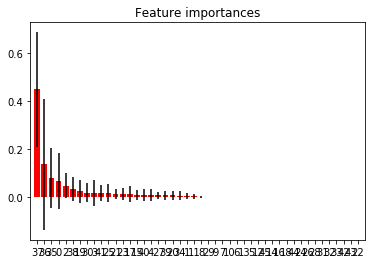

In [46]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

names = X.columns

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
# plt.savefig('../img/feature_importances.svg', transparent=True, bbox_inches='tight', pad_inches=0)    
plt.show()

The best features now are:

1. total_rec_prncp (0.232828)
2. last_pymnt_amnt (0.145886)
3. total_pymnt_inv (0.140592)
4. total_pymnt (0.129989)

So it seems like there is some correlation with how much has been paid off and delinquincy.

We should look into these correlations more.

So, what we'd do now is chop off all except the first 10, maybe, and see if we can improve that
data (with scaling, encoding, missing data imputing, etc.)

We would also consider mixtures of features, e.g. the proportion of the loan repaid, etc.

## Tasks

- Continue this analysis if you have time